In [28]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# import pyspark
# from pyspark.sql import SparkSession

In [29]:
url_reviews = 'https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz'
df_reviews = pd.read_json(url_reviews, lines=True)


url_meta = 'https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Digital_Music.jsonl.gz'
df_meta = pd.read_json(url_meta, lines=True)


In [30]:
# df_reviews_local = pd.read_json('../data/raw/amazon_2023/Digital_Music.jsonl', lines=True)
# df_meta_local = pd.read_json('../data/raw/amazon_2023/meta_Digital_Music.jsonl', lines=True)
# df_reviews_local.head()

## DATA CLEANING

#### Cleaning REVIEWS

In [31]:
df_reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292,0,True
1,5,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000,0,True
2,5,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006,0,True
3,1,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000,0,True
4,3,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000,0,False


In [32]:
df_reviews.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [33]:
df_reviews.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [34]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             130434 non-null  int64         
 1   title              130434 non-null  object        
 2   text               130434 non-null  object        
 3   images             130434 non-null  object        
 4   asin               130434 non-null  object        
 5   parent_asin        130434 non-null  object        
 6   user_id            130434 non-null  object        
 7   timestamp          130434 non-null  datetime64[ns]
 8   helpful_vote       130434 non-null  int64         
 9   verified_purchase  130434 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 9.1+ MB


> Columns asin and parent_asin seem to hold identical values. Determine how many rows dont have equal columns values. If it's a small percentage, then the asin can be dropped.

In [35]:
print( 100* len(df_reviews[df_reviews.parent_asin != df_reviews.asin]) / len(df_reviews) )

0.03296686446785348


In [36]:
cols_to_drop = ['title', 'text', 'images', 'helpful_vote', 'verified_purchase', 'asin']
df_reviews.drop(cols_to_drop, axis=1, inplace=True)
df_reviews

,rating,parent_asin,user_id,timestamp
0,5,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292
1,5,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000
2,5,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006
3,1,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000
4,3,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000
...,...,...,...,...
130429,5,B089NZYT26,AF5NJAIT4LBULU65RF7VHEPCSBGQ,2022-01-03 14:55:21.610
130430,5,B07D66LF8J,AGNANZSHBC7DCUQHHSYRUMSNCUZA,2020-01-20 08:56:37.233
130431,5,B07WQJZ4XQ,AHOWFPVORG6KHHI3P5QFIVQZ5XYA,2019-12-13 23:49:01.163
130432,1,B000NP1OLQ,AEA5DJGQPPBEGX4ZQJPXYVG7VITQ,2015-06-07 01:52:00.000


#### Cleaning META

In [37]:
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Digital Music,Baja Marimba Band,4.9,8,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],"{'Date First Available': 'February 28, 2010'}",B000V87RP2,NaN
1,Digital Music,'80s Halloween-All Original Artists & Recordings,5.0,3,[],[],14.98,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Love and Rockets (Artist), Duran Duran (...",[],{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B0062F0MJQ,NaN
2,Digital Music,TRIO +1,5.0,1,[],[CD ALBUM],57.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Rob Wasserman Format: Audio CD,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B00005GT12,NaN
3,Digital Music,"Gold and Silver: Lehar, Delibes, Lanner, Johan...",5.0,1,[],[],29.91,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Franz Lehar (Composer), Leo Delibes (Com...",[],"{'Manufacturer': 'Hungaroton / White Label', '...",B0007PD2BW,NaN
4,Digital Music,Grateful Dead Dave's Picks Volume 25 Live at B...,4.9,20,[],[Sold out. Numbered limited edition],149.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],"Grateful Dead (Artist, Orchestra) Format: ...",[],{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B079CPD45R,NaN


In [38]:
df_meta.shape

(70537, 14)

In [39]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70537 entries, 0 to 70536
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    70537 non-null  object 
 1   title            70537 non-null  object 
 2   average_rating   70537 non-null  float64
 3   rating_number    70537 non-null  int64  
 4   features         70537 non-null  object 
 5   description      70537 non-null  object 
 6   price            40125 non-null  float64
 7   images           70537 non-null  object 
 8   videos           70537 non-null  object 
 9   store            66299 non-null  object 
 10  categories       70537 non-null  object 
 11  details          70537 non-null  object 
 12  parent_asin      70537 non-null  object 
 13  bought_together  0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 7.5+ MB


In [40]:
# Get % of empty lists [] in cols of interest and delete if it exceeds threshold values

threshold = 0.25
cols_of_interest = ['features', 'videos', 'categories'] #-- Exclude description as it can be used in feature groups down the line.

for col in cols_of_interest:

    pct = sum(~df_meta[col].astype(bool)) / len(df_meta)
    print(f'Empty [{col}] : {100*pct:.2f}%')
    
    # Drop column if it exceeds threshold value for empty list
    if pct >= threshold:
        df_meta.drop(col, axis=1, inplace=True)

df_meta.head(2)  

Empty [features] : 99.90%
Empty [videos] : 99.79%
Empty [categories] : 99.99%


,main_category,title,average_rating,rating_number,description,price,images,store,details,parent_asin,bought_together
0,Digital Music,Baja Marimba Band,4.9,8,[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,None,"{'Date First Available': 'February 28, 2010'}",B000V87RP2,NaN
1,Digital Music,'80s Halloween-All Original Artists & Recordings,5.0,3,[],14.98,[{'thumb': 'https://m.media-amazon.com/images/...,"Love and Rockets (Artist), Duran Duran (...",{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B0062F0MJQ,NaN


In [41]:
# Drop other columns that are not needed in the analysis
# Although [store] has missing list values, it contains additional details that might be of help with the search, so we keep it for now. 
# Price is not needed for this analysis so we drop it for now. 
# average_rating and rating number can be dropped as well 

cols_to_drop = ['main_category', 'images', 'bought_together', 'price', 'average_rating', 'rating_number']
df_meta.drop(cols_to_drop, axis=1, inplace=True )
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70537 entries, 0 to 70536
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        70537 non-null  object
 1   description  70537 non-null  object
 2   store        66299 non-null  object
 3   details      70537 non-null  object
 4   parent_asin  70537 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


### Merging meta and reviews

In [42]:
df = pd.merge(df_meta, df_reviews, how='right', on='parent_asin')
df.head()

,title,description,store,details,parent_asin,rating,user_id,timestamp
0,Good Things,[],Aloe Blacc Format: Audio CD,{'Package Dimensions': '5.55 x 4.97 x 0.54 inc...,B004RQ2IRG,5,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292
1,Sugar Red Drive,[],Sugar Red Drive Ralph Farris Format: Audio CD,{'Package Dimensions': '5.4 x 4.9 x 0.3 inches...,B0026UZEI0,5,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000
2,Body + Soul: The '70s (Time-Life),[],"Joe Simon (Artist), Teddy Pendergrass (A...",{},B0055JSYHC,5,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006
3,"Aventura, Haiducïï, Kate Ryan, Fanta 4, Laith ...",[],Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B000F9SMUQ,1,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000
4,GOSSIP PARTY! -THE BEST OF CELEB HITS R&B N HO...,[CD ALBUM],D.locke Format: Audio CD,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",B0049D1WVK,3,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000


In [43]:
df.shape

(130434, 8)

## EDA

#### Summary Statistics

In [44]:
# Info on counts

n_products = df.parent_asin.nunique()
n_titles = df.title.nunique()
n_ratings = len(df.rating)
n_users = df.user_id.nunique()

print(f'Total unique products: {n_products}')
print(f'Total unique poduct name: {n_titles}')
print(f'Total ratings: {n_ratings}')
print(f'Total unique users: {n_users}')

Total unique products: 70511
Total unique poduct name: 68417
Total ratings: 130434
Total unique users: 100952


In [45]:
# Summary Statistics

avg_rating_p_product = round(n_ratings/n_products, 2)
avg_rating_p_user = round(n_ratings/n_users, 2)

print(f'Average rating per product: {avg_rating_p_product}')
print(f'Average rating per user: {avg_rating_p_user}')

Average rating per product: 1.85
Average rating per user: 1.29


In [46]:
# Summary statistics using describe()

df.select_dtypes('number').describe()

,rating
count,130434.000000
mean,4.532837
std,1.027994
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


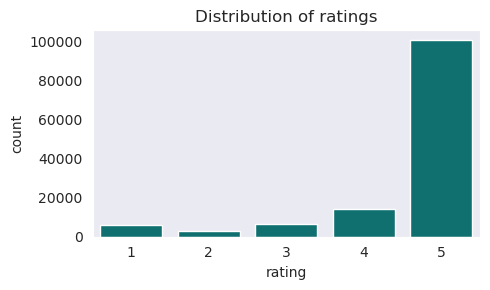

In [47]:
# Distribution of ratings

sns.set_style('dark', {'axes.grid':False})
plt.figure(figsize=(5,3))

_ = sns.countplot(data=df, x='rating', color='teal')
_.set_title('Distribution of ratings')
plt.tight_layout()
plt.show()


#### Outlier Detection

In [48]:
# UDF: Function for extracting outliers and non-outliers from a dataframe

# def process_outliers(data_df: pd.DataFrame, col: str, is_outlier = True) -> pd.DataFrame:
#     '''Desc: Custom function for extracting outliers or non-outliers depending on the is_outlier argument.
    
#     Input: 
#         data_df: pd.DataFrame - dataframe to process
#         col: str - column to process
#         is_outlier: bool - If True (by default) will extract outliers; otherwise, non-outliers'''
    
#     q1 = data_df[col].quantile(0.25)
#     q3 = data_df[col].quantile(0.75)
#     iqr = q3 - q1
#     if is_outlier:
#         result = data_df[((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
#     else:
#         result = data_df[~((data_df[col] < (q1 - 1.5 * iqr)) | (data_df[col] > (q3 + 1.5 * iqr)))] #.any(axis=1)]
        
#     return result

In [49]:
# Highly rated items that are outliers

# df_ol = process_outliers(df, 'rating', is_outlier=True)
# df_ol.sort_values('rating', ascending=False)[0:5]

In [50]:
# Highly rated items that are outliers

# df_ol = process_outliers(df_meta, 'rating_number', is_outlier=True)
# df_ol.sort_values('rating_number', ascending=False).head(5)

#### Pairwise Relationship

> Code block disabled due to limited processing power.

In [51]:
# sns.set_style('dark', {'axes.grid':False})
# plt.figure(figsize=(10,10))
# sns.pairplot(df_meta.select_dtypes(exclude='object')).fig.suptitle('Numeric columns Pairplot', y=1.0)
# plt.tight_layout()
# plt.show()

### Content-Based Filtering

#### Recommending Top Rated Items - A solution to Cold-Start problem

In [ ]:
# Top 10 Frequently Rated

n_result = 10
df_most_rated = pd.DataFrame(df[['parent_asin', 'title']].value_counts()[0:n_result]).reset_index()
df_most_rated

,parent_asin,title,count
0,B00003CXKT,Test Big Data 1737,398
1,5559166928,Elvis Presley - He Touched Me The Gospel Music...,319
2,B001EJH4SW,2 For 1 - Hide 'Em In Your Heart 1,215
3,B0000041CD,Mozart For Meditation,178
4,B00A44I5M2,Amazing Grace - 40 Treasured Hymns,164
5,B000002TYX,Anthology 1,154
6,B000058983,Forever Changes,151
7,1401923119,The Biology of Belief: Unleashing the Power of...,151
8,B000002TYZ,Anthology 2,146
9,B01EKROZ54,BTS BANGTAN BOYS - YOUNG FOREVER special Album...,142


In [ ]:
# Test
# x = df.groupby(['parent_asin', 'title']).agg(rating_count = ('rating', 'mean')).reset_index().sort_values('rating_count', ascending=False)
# x

,parent_asin,title,rating_count
35255,B004J80CU2,Jeff Beck Years,5.0
42919,B00ADAPL3S,Proezas En Vivo Miel San Marcos,5.0
42922,B00ADE67WI,Let's Dance (Pottery Barn Kids) Audio CD,5.0
42923,B00ADG3BVG,Champion Jack Dupree - I'm Happy to be Free (M...,5.0
42925,B00ADQUBNC,Salve Jorge Nacional 1 (Trilha Sonora Novela),5.0
...,...,...,...
4127,B00004D3J1,"Duane Eddy, Buddy Holly, Shangri-Las, Rod Bern...",1.0
64222,B07CCP9XG1,Dua Lipa Bonus Track,1.0
4124,B00004D00L,Pulp Fiction,1.0
41632,B008TVPGEC,Clutch,1.0


In [92]:
# Test
df[df.parent_asin == 'B07JZB8FY9']['rating'].mean()

5.0

TOP RATED - Use Bayesian

In [60]:
prod_stats = df.groupby(['parent_asin', 'title'])['rating'].agg(['count', 'mean']).reset_index().sort_values(['mean', 'count'], ascending=False)
prod_stats

,parent_asin,title,count,mean
65218,B07JZB8FY9,Victory,33,5.0
69180,B09FYLHP4K,Greatest Hits Volume I & Volume II (2CD),24,5.0
36875,B0055HM87G,Jackie Evancho - Dream With Me DELUXE LIMITED ...,23,5.0
66857,B083L4DT5R,Greatest Hits: Huey Lewis And The News,23,5.0
64515,B07DMQXZNF,75 Greatest Hits of Patsy Cline (3 CD Boxset),21,5.0
...,...,...,...,...
70359,B0BM2ZYK7B,"ORQUESTA LA SOLUCION ""BUENA PESCA"" PRESENTANDO...",1,1.0
70419,B0BR7V3MF3,aespa - [2022 Winter SMTOWN : SMCU PALACE] (GU...,1,1.0
70420,B0BRDJHKGT,Gingerbread Man - Exclusive Limited Edition Ap...,1,1.0
70479,B0BZHKJ85X,ΤΗΕ DΑɌΚ ՏΙDΕ ΟҒ ΤΗΕ ΜΟΟΝ: ԼΙVΕ ΑΤ ԜΕΜΒԼΕΥ 197...,1,1.0


In [ ]:
# c_confidence:  typical dataset size or average number(or count) of ratings for a given movie

c_confidence = prod_stats['count'].mean()

# m_priori :  mean rating across all products

m_priori = prod_stats['mean'].mean()

print(f'Confidence : {c_confidence}')
print(f'Priori: {m_priori}')

Confidence : 1.8498390322077407
Priori: 4.528631773192074


In [ ]:
# UDF: Bayesian average

def bayesian_average(l_ratings):
    bayes_avg =  ( (c_confidence * m_priori) + l_ratings.sum() )/ ( c_confidence + l_ratings.count())
    return round(bayes_avg, 3)

In [ ]:
# Get the bayesian average in prod_stats

bayesian_ratings = df.groupby(['parent_asin', 'title'])['rating'].agg(bayesian_average).reset_index().sort_values('rating', ascending=False)
bayesian_ratings[0:n_result]

,parent_asin,title,rating
65218,B07JZB8FY9,Victory,4.975
69180,B09FYLHP4K,Greatest Hits Volume I & Volume II (2CD),4.966
66857,B083L4DT5R,Greatest Hits: Huey Lewis And The News,4.965
36875,B0055HM87G,Jackie Evancho - Dream With Me DELUXE LIMITED ...,4.965
64515,B07DMQXZNF,75 Greatest Hits of Patsy Cline (3 CD Boxset),4.962
62697,B0727YYD44,"A Little Magic, A Little Kindness–The Complete...",4.960
65896,B07QH1FYRX,Madame X: Deluxe Set,4.960
66159,B07T9CLVCG,BAEKHYUN The 1st Mini Album 'City Lights',4.959
66866,B083L9BL29,Hits,4.958
22977,B0018O3P54,Indescribable,4.956


In [80]:
# Retrieve Top Items to recommend

# cols_to_show = ['parent_asin', 'title', 'average_rating', 'rating_number']

# df_toprated = df_meta.sort_values(by=['average_rating', 'rating_number'], ascending=[False,False])
# df_toprated[:n_result][cols_to_show]

## PRE-PROCESSING

### Find Similar Products

### Test Merge Right

(1, 7)

Is the average_rating in META == mean(REV.rating.mean())